# **Predicción de diabetes utilizando regresión logística**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/content/diabetes2.csv')

## **Limpieza de datos**

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
numerical_column_names = data.select_dtypes(include=['number']).columns
print("Numerical Column Names:", numerical_column_names.tolist())

Numerical Column Names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [7]:
object_column_names = data.select_dtypes(include=['object']).columns
print("Object Column Names:", object_column_names.tolist())

Object Column Names: []


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [14]:
print(data[data['Pregnancies'] == 0].shape)
print(data[data['Glucose'] == 0].shape)
print(data[data['Glucose'] == 0].shape)
print(data[data['BloodPressure'] == 0].shape)
print(data[data['SkinThickness'] == 0].shape)
print(data[data['Insulin'] == 0].shape)
print(data[data['BMI'] == 0].shape)

(111, 9)
(5, 9)
(5, 9)
(35, 9)
(227, 9)
(374, 9)
(11, 9)


Aquí, las características con más ceros son la presión arterial, el grosor de la piel, la insulina y el IMC. Entre ellas, la insulina tiene la mayor cantidad de ceros, mientras que el IMC tiene la menor cantidad.

In [15]:
data =data.loc[(data[['Glucose', 'BloodPressure', 'BMI']] != 0).all(axis=1)]
data.loc[data['SkinThickness'] == 0, 'SkinThickness'] = data['SkinThickness'].mean()
data.loc[(data['Insulin'] != 0), 'InsulinKnown'] = 1
data.loc[(data['Insulin'] == 0), 'InsulinKnown'] = 0

In [16]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'InsulinKnown'],
      dtype='object')

In [17]:
data = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'InsulinKnown', 'Outcome']]

In [18]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
InsulinKnown,0
Outcome,0


In [20]:
data.duplicated().sum()

0

In [21]:
print("Data Size:",data.shape)

Data Size: (724, 9)


In [22]:
cor_mat= data.corr()
cor_mat

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,InsulinKnown,Outcome
Pregnancies,1.000000,0.134915,0.209668,0.013755,0.012342,-0.025996,0.557066,-0.182693,0.224417
Glucose,0.134915,1.000000,0.223331,0.166683,0.223276,0.136630,0.263560,0.026343,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.137467,0.287403,-0.000075,0.324897,-0.152591,0.166703
SkinThickness,0.013755,0.166683,0.137467,1.000000,0.554488,0.148672,0.031134,0.227211,0.188716
BMI,0.012342,0.223276,0.287403,0.554488,1.000000,0.154858,0.020835,0.097719,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.148672,0.154858,1.000000,0.023098,0.157978,0.184947
Age,0.557066,0.263560,0.324897,0.031134,0.020835,0.023098,1.000000,-0.229760,0.245741
InsulinKnown,-0.182693,0.026343,-0.152591,0.227211,0.097719,0.157978,-0.229760,1.000000,-0.028114
Outcome,0.224417,0.488384,0.166703,0.188716,0.299375,0.184947,0.245741,-0.028114,1.000000


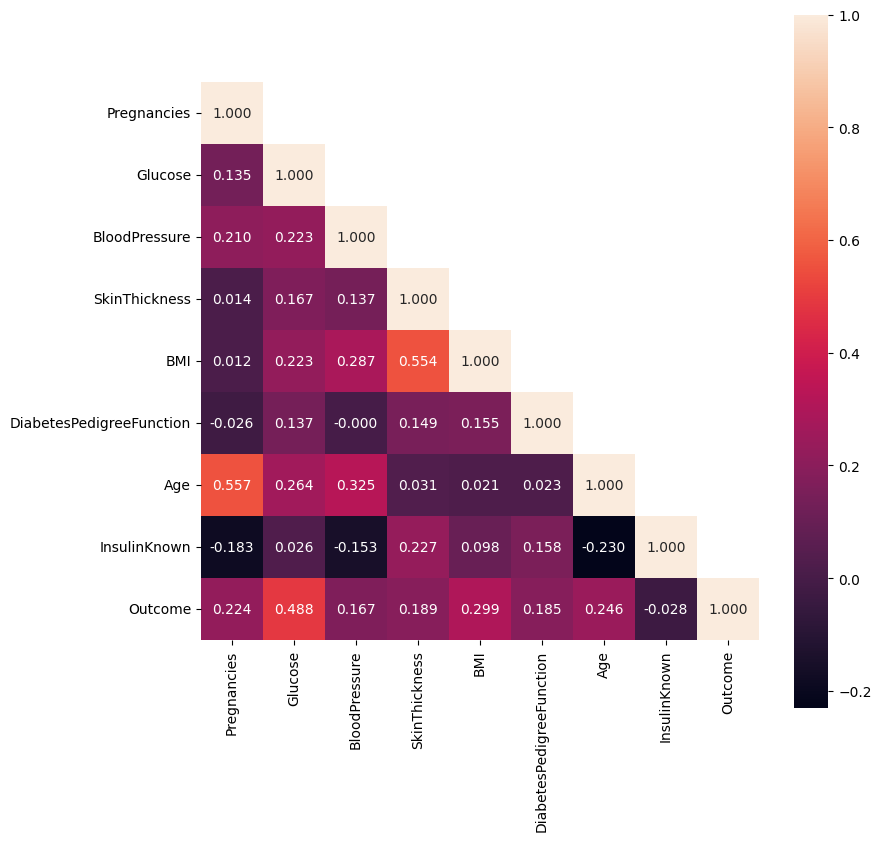

In [23]:
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(9, 9)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True, fmt=".3f")

plt.show()

In [24]:
X = data.drop(['Outcome'], axis = 1)
y = data['Outcome']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 101)

In [26]:
scaler = RobustScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Entrenamiento**

In [29]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [31]:
score = model.score(X_test_scaled, y_test)
score

0.863013698630137

## **Predicción**

In [33]:
X_train.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,InsulinKnown
409,1,172,68,49.0,42.4,0.702,28,1.0


In [34]:
vector_prueba = {'Pregnancies': 1,
                 'Glucose': 172,
                 'BloodPreasure': 68,
                 'SkinThickness': 49,
                 'BMI': 42.4,
                 'DiabetesPedigreeFunction': 0.70,
                 'Age': 28,
                 'InsulinKnown': 1}
vector_prueba = pd.DataFrame(vector_prueba, index=[0])
vector_prueba

,Pregnancies,Glucose,BloodPreasure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,InsulinKnown
0,1,172,68,49,42.4,0.7,28,1


In [36]:
model.predict(vector_prueba)[0]

1